In [1]:
!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: S:\Machine Learning Scaler\Imbalanced Data\Spam_finalData.csv

  0%|          | 0.00/1.64M [00:00<?, ?B/s]
 32%|###1      | 524k/1.64M [00:00<00:01, 1.02MB/s]
 64%|######3   | 1.05M/1.64M [00:01<00:00, 960kB/s]
 96%|#########5| 1.57M/1.64M [00:01<00:00, 809kB/s]
100%|##########| 1.64M/1.64M [00:01<00:00, 826kB/s]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dt = pd.read_csv('Spam_finalData.csv')
dt.head()

,label_num,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,0,-0.031489,-0.003323,-0.071238,0.047743,0.060798,0.046597,-0.069530,-0.000031,-0.037924,0.024059,-0.015085,-0.007752,-0.021617,-0.025395,0.046050
1,0,-0.122601,0.114176,0.460451,0.000953,0.014707,0.007610,-0.011173,-0.052478,0.040209,0.000076,0.010306,0.023397,-0.007294,0.063543,0.081119
2,0,-0.076681,-0.084330,-0.054658,-0.048236,-0.019999,-0.045909,-0.004712,-0.001524,0.013735,-0.022429,0.010273,-0.007458,-0.044340,-0.051093,0.025553
3,1,-0.075948,-0.059706,-0.025301,-0.037603,-0.001208,-0.030660,0.018873,-0.013434,-0.014981,0.000741,0.005653,0.032153,0.001884,-0.018005,-0.011060
4,0,-0.054680,0.033033,-0.090885,-0.047280,-0.029304,0.085893,-0.105351,-0.053915,-0.006857,0.021673,0.056718,0.006140,0.042217,0.018862,-0.007373


In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])



In [4]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [5]:
print("Accuracy : " , model.score(X_test,y_test))

Accuracy :  0.9164733178654292


In [6]:
from sklearn.metrics import confusion_matrix

In [7]:
y_pred =  model.predict(X_test)

In [8]:
y_pred

array([0, 1, 1, ..., 0, 0, 0], shape=(1293,))

In [9]:
cm = confusion_matrix(y_test,y_pred)

In [10]:
cm

array([[831,  75],
       [ 33, 354]])

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

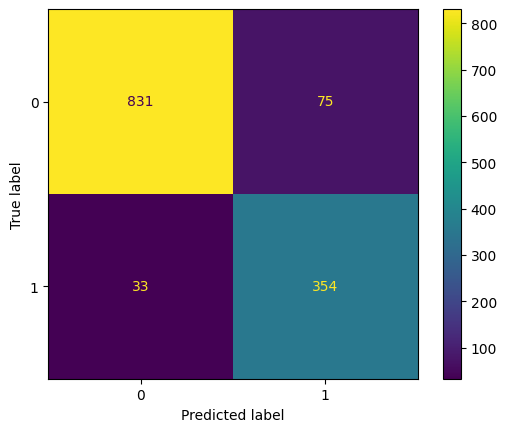

In [12]:
ConfusionMatrixDisplay(cm).plot()

In [13]:
np.diag(cm).sum() / cm.sum()

np.float64(0.9164733178654292)

Defining tp,tn,fp,fn


In [14]:
tp  = cm[1,1]
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]


print(tp,tn,fp,fn)

354 831 75 33


In [15]:
from sklearn.metrics import precision_score

print(precision_score(y_test, y_pred))

from sklearn.metrics import recall_score

print(recall_score(y_test, y_pred))

0.8251748251748252
0.9147286821705426


In [16]:
# Verificaiton

precesion  = (tp)/(tp+fp)

recall = (tp)/(tp+fn)


print(precesion)
print(recall)

0.8251748251748252
0.9147286821705426


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       906
           1       0.83      0.91      0.87       387

    accuracy                           0.92      1293
   macro avg       0.89      0.92      0.90      1293
weighted avg       0.92      0.92      0.92      1293



In [18]:
# Calculating F1 Score :-


precesion_2 = tn/(tn+fn)
recall_2 = tn/(tn+fp)



def f1_score(precesion,recall):
    f1 = 2 * (  (precesion*recall) / (precesion+recall)  )
    print(f1)
    

f1_score(precesion_2,recall_2)
f1_score(precesion , recall)


0.9389830508474577
0.8676470588235293


In [19]:
 # calc of sensitivity and specificity


sensitivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)

print(sensitivity)
print(specificity)

0.9147286821705426
0.9172185430463576


In [20]:
# FPR => tracks 1-specificity
print(1-specificity)

0.08278145695364236


In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
auc

np.float64(0.91597361260845)

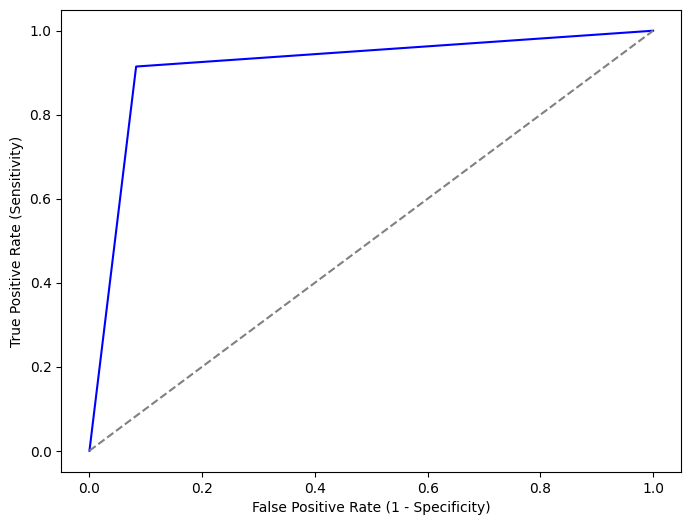

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()